# ASSIGNMENT 6 : MULTIPLE LINEAR REGRESSION

Use Case : Perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Steps to be taken : 
1. importing important libraries
2. Loading the dataset
3. EDA 1 (Data Overview, Basic Data cleaning, Data Preprocessing)
4. EDA 2 (model building and evaluation)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\6. MLR\ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


### 1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [7]:
df.shape

(1436, 11)

We have 1436 rows and 11 columns.

In [12]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


Information about the columns.

In [17]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Describing the statistical features of the dataset.
* We can observe that columns like Price, KM, cc, Weight have high standard Deviations.
* Column Price has it's mean (10730.824513) has large variabtion with minimum and maximum value so the data could be right skewed.
* Cylinder column has standard deviation of 0 and other values are almost same so we can say that the distribution of the data lies around 4.
* Gears column has stable distribution of data since it's mean, max and standard deviation is usually lying around 3 to 6

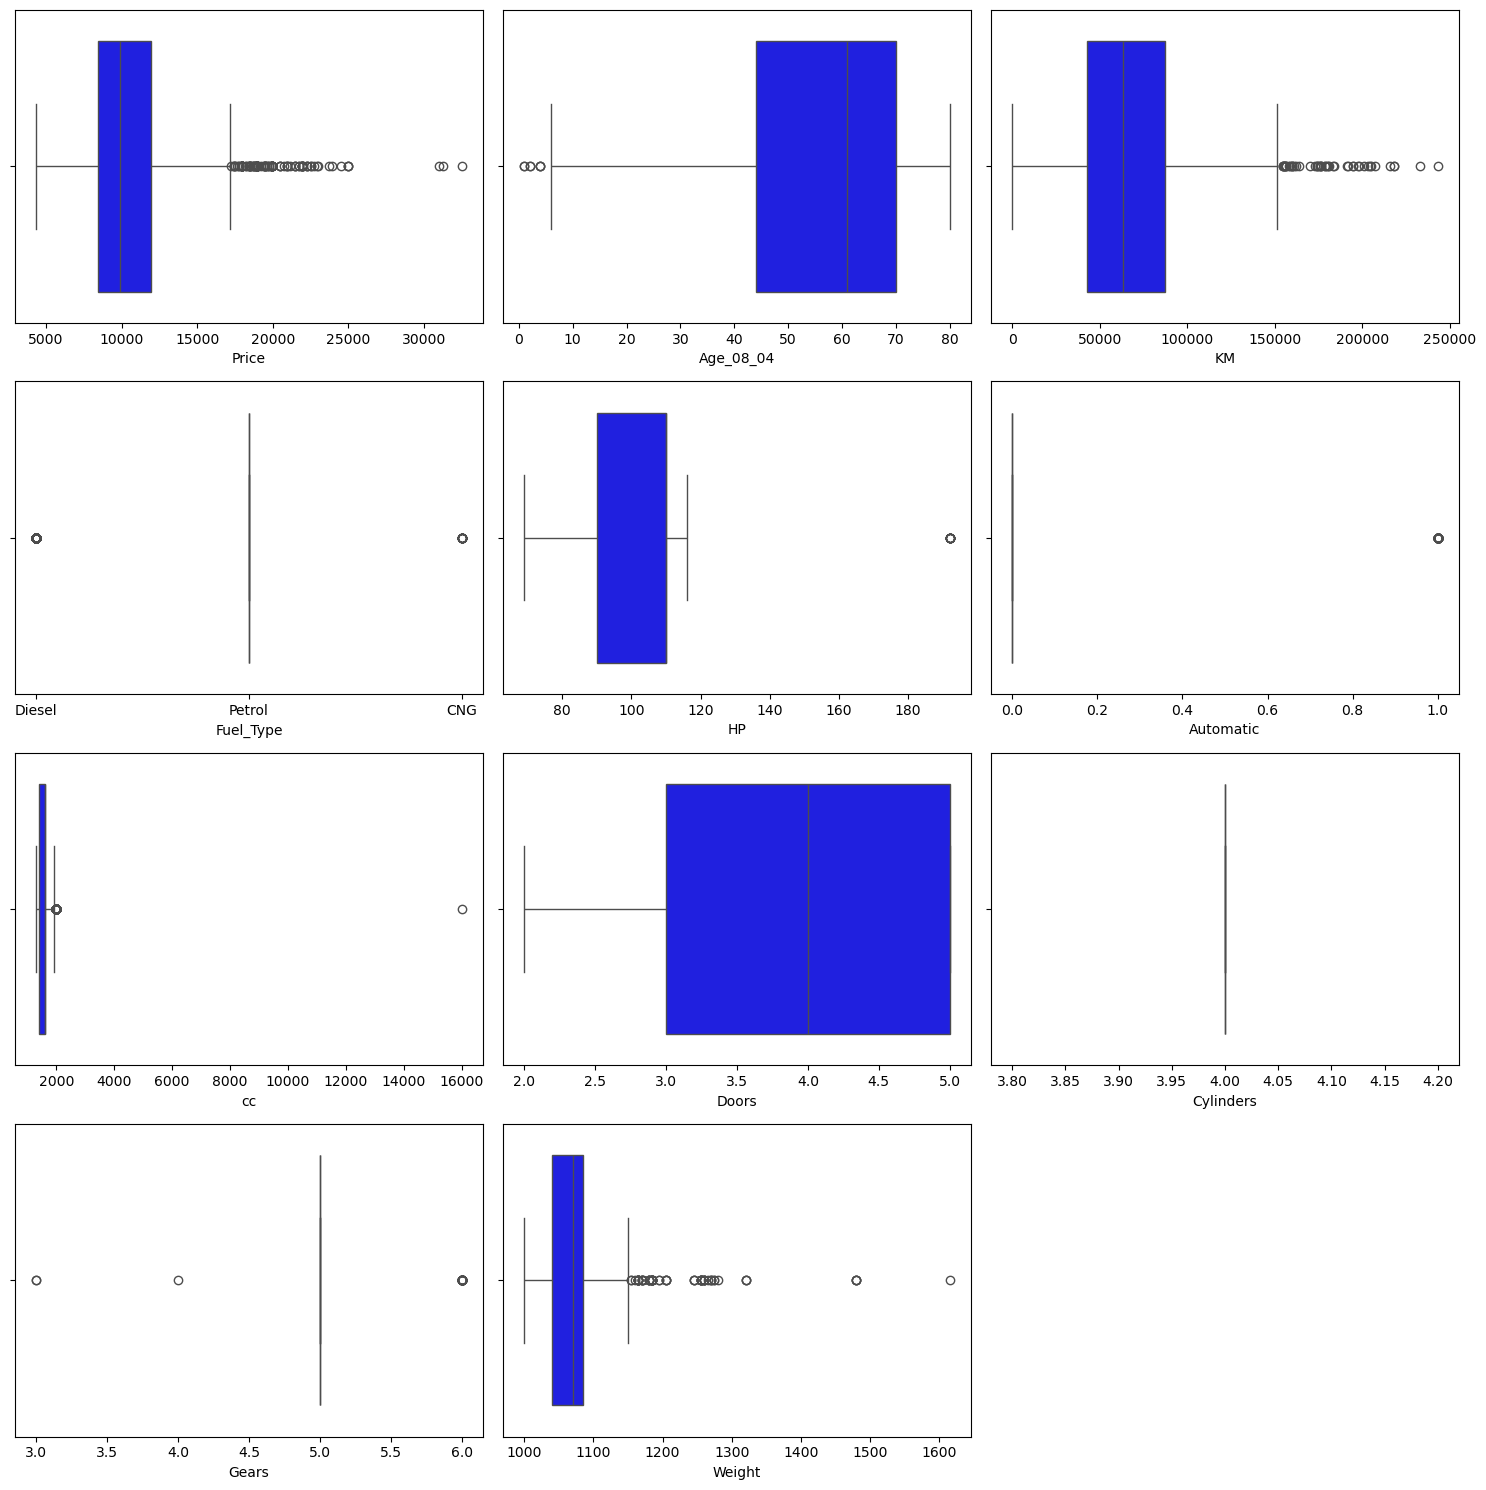

In [22]:
# Let's Check for outliers if any
df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(4, 3, index)       #creating subplot
    sns.boxplot(x=df[col], color='blue')         # creating hist plot inside each subplot
    index += 1                     #increse the index
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

We surely have a lot of outlier.
* **We will be assuming that** columns like Price, Fuel_type, Automatic has no need to work with the outliers because Price is the target variable, Fuel type can we different for different cars and rarely but surely few cars are automatic.
* **We are assuming that** KM can be a very important factor since more the car is driven lesser will be it's resale price.
* We'll be treating all other column's outliers.

In [25]:
#changing the name of column for our convenience

df.rename(columns = {"Age_08_04":"Age"}, inplace=True)

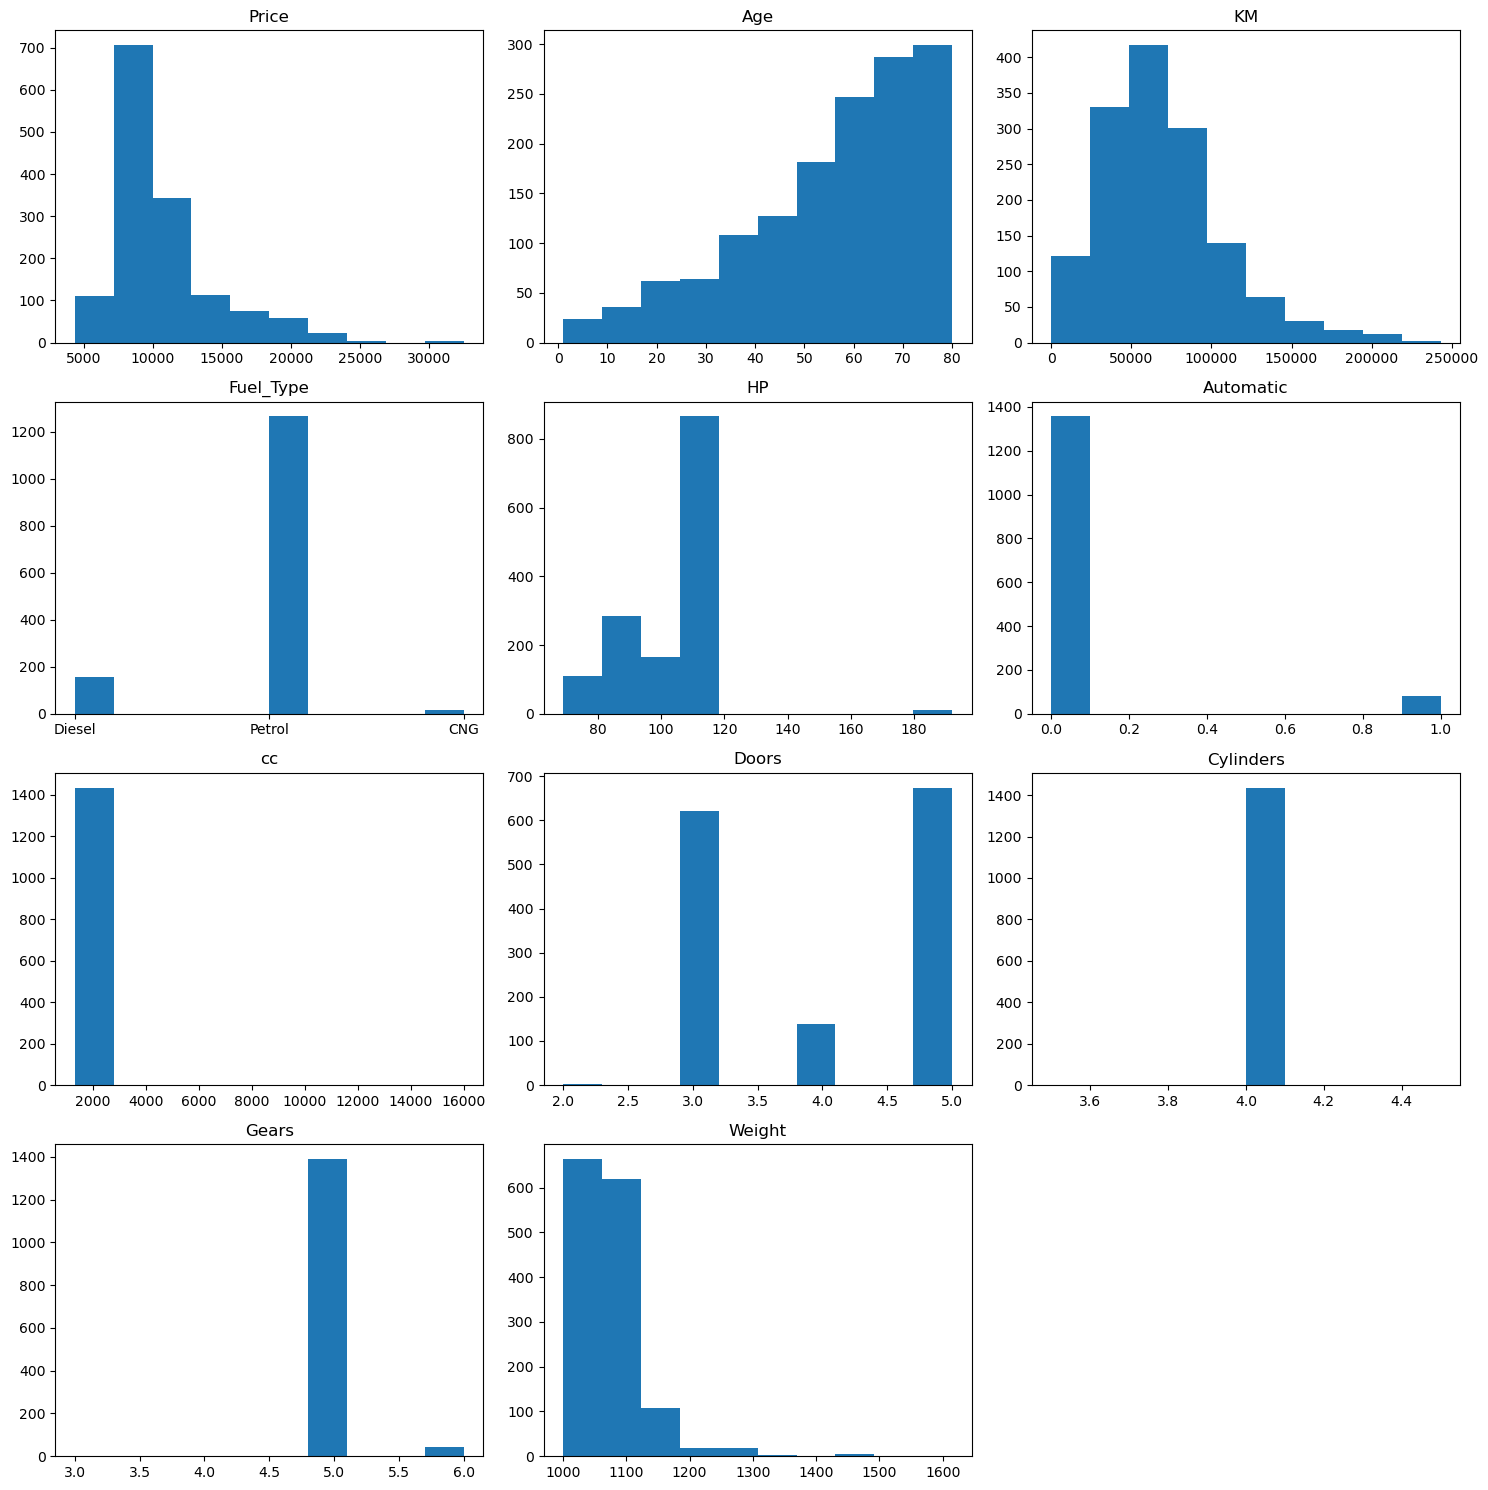

In [27]:
df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(4, 3, index)       #creating subplot
    plt.hist(x=df[col])            # creating hist plot inside each subplot
    plt.title(col)                 # setting up title as column name
    index += 1                     #increse the index
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

From above hisplot we can guess the distribution of the data
* Columns like Price, KM, Weights are probably left skewed.
* columns like Age, Doors are right skewed.
* Fuel_type column has 3 values.
* cc, Cylinder column has only data points 2000 and 4 respectively.

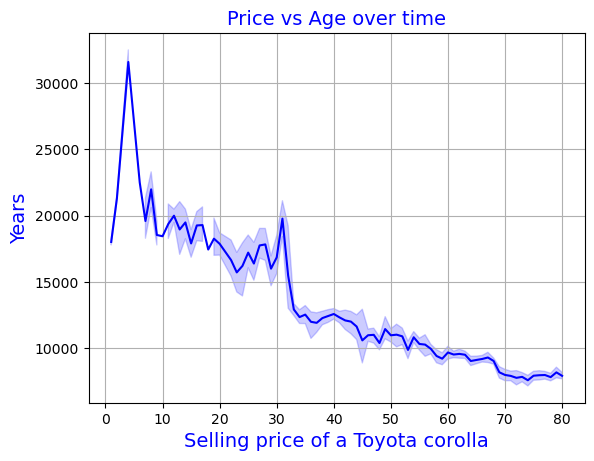

In [30]:
# Data Visulization for Price vs Age

sns.lineplot(x='Age',y='Price', data=df, color='blue')                     #making a lineplot
plt.title("Price vs Age over time", color="blue",size = 14)                #setting title of the plot
plt.xlabel("Selling price of a Toyota corolla", color='blue',size = 14)    #setting x-label
plt.ylabel("Years", color="blue", size = 14)                               #setting y-label
plt.grid()                                                                 #shows grid
plt.show()                                                                 #shows the plot

From the above graph we can say as the years goes by the Price of Toyoya corolla car goes down as well, which is obvious in a way as the the car gets old the price goes down.

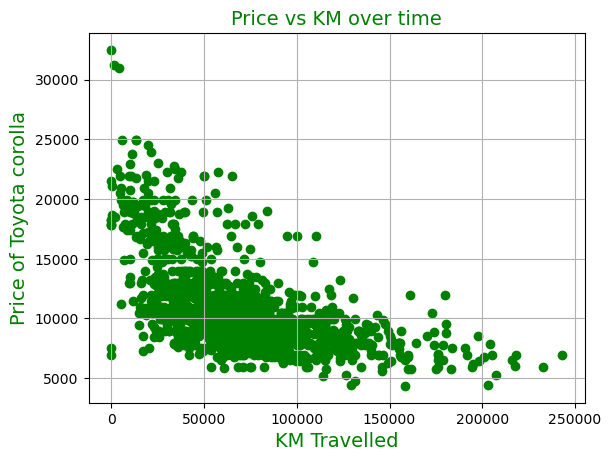

In [33]:
# Data Visulization for Price vs KM

plt.scatter(x='KM',y='Price', data=df, color='green')                       #making a scatterplot
plt.title("Price vs KM over time", color="green",size = 14)                 #setting title of the plot
plt.xlabel("KM Travelled", color='green',size = 14)                         #setting x-label
plt.ylabel("Price of Toyota corolla", color="green", size = 14)             #setting y-label
plt.grid()                                                                 # used to shows grid
plt.show()                                                                 #shows the plot

Here also we observe that more the car is driven the lesser its value get.

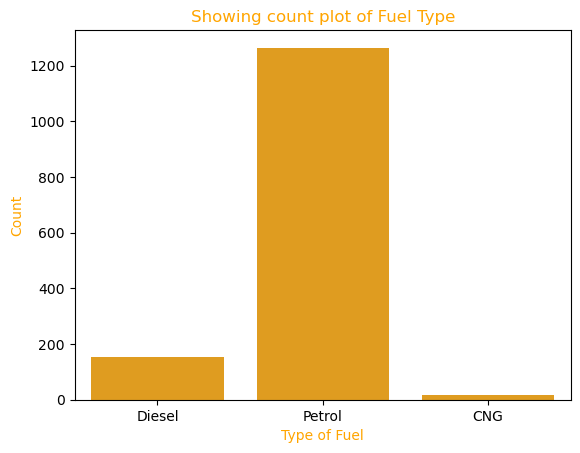

In [36]:
#Lets work with the categorical column
sns.countplot(x=df['Fuel_Type'], color='orange')
plt.title("Showing count plot of Fuel Type", color='orange')
plt.xlabel("Type of Fuel",color='orange')
plt.ylabel("Count",color='orange')
plt.show()

We can see here most of the cars are of petrol type and only few are of those cars are of Diesel and CNG type.

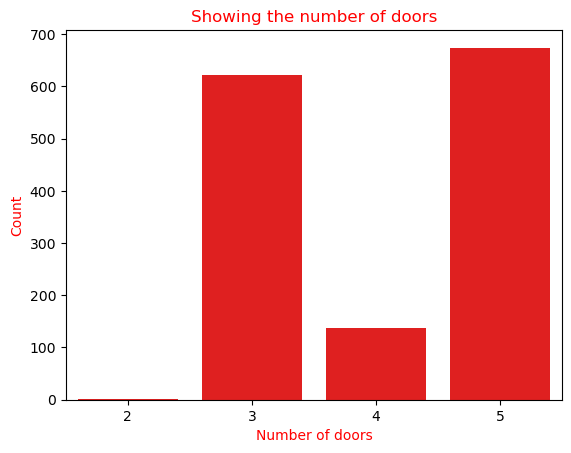

In [39]:
#Lets see the distribution of data on number of doors
sns.countplot(x=df['Doors'], color='red')
plt.title("Showing the number of doors", color='red')
plt.xlabel("Number of doors",color='red')
plt.ylabel("Count",color='red')
plt.show()

Only a few cars have 2 doors and mostly are of 5 and 3 respectively.

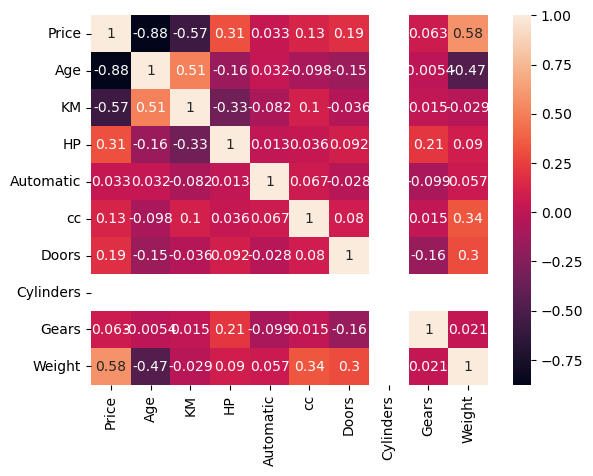

In [42]:
#Let's check for correlation of all the columns.
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

* From above heatmap we can see that most of the columns are not highly correlated
* We must note that Price and Age of the car is highly negatively correlated

**We are assuming that**
* We don't need cylinder column since it basically has only 1 value.

In [45]:
df.drop("Cylinders", axis=1, inplace=True)                 #removing Cylinder column

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [49]:
#To find all the categorical columns in the dataset
category = []                       # definiing a list to place all the categorical columns
for col in df.columns:              # run the loop in all the columns
    if df[col].dtype == 'object':   # check the type of each column if Ture then enter else ignore
        category.append(col)        # if True then append the column name in the category list
print(category)

['Fuel_Type']


From above we can see only Fuel_type is of categorical type, we need to preprocess this column and convert it from categorical to numerical.

In [52]:
df.Fuel_Type.unique()        

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

We have 3 unique values.

In [55]:
# we will convert this using dictionary function.
# define the dictionary
d = {'Diesel':0,'Petrol':1, 'CNG':2}
# map the above defined dictionary into the column
df['Fuel_Type'] = df['Fuel_Type'].map(d)
df['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

Fuel Type is converted to numerical column.

---------------------------------------------------

Feature extraction

### 2. Splitting the data for training and testing

In [58]:
df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

Price is our target variable and other columns are features.

In [61]:
x = df.iloc[:,1:].values
y = df.iloc[:,:1].values
print(x,y)

[[   23 46986     0 ...     3     5  1165]
 [   23 72937     0 ...     3     5  1165]
 [   24 41711     0 ...     3     5  1165]
 ...
 [   71 17016     1 ...     3     5  1015]
 [   70 16916     1 ...     3     5  1015]
 [   76     1     1 ...     5     5  1114]] [[13500]
 [13750]
 [13950]
 ...
 [ 8500]
 [ 7250]
 [ 6950]]


In [63]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1148, 9), (288, 9), (1148, 1), (288, 1))

### 3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [66]:
# Building Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [68]:
#Interpret the coefficients of the model
coefficients = LR.coef_
intercept = LR.intercept_
# print(coefficients, intercept)
print("Coefficient of the variables are : ",coefficients)
print("Intercept is : ",intercept)

Coefficient of the variables are :  [[-1.20405708e+02 -1.97355717e-02  2.86418249e+02  2.39916730e+01
   3.22515547e+02 -9.09032657e-02 -3.99586776e+00  6.43311361e+02
   2.10150910e+01]]
Intercept is :  [-9493.6978673]


These are all the coefficients and intercept value of our independent variables respectively.

In [71]:
#Evaluation of Multiple Linear Regression Model.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

print("Training r2 score of the MLR model is : ", r2_score(y_train, LR.predict(x_train)))
print("Testing r2 score of the MLR model is : ", r2_score(y_test, LR.predict(x_test)))

Training r2 score of the MLR model is :  0.8661569648857386
Testing r2 score of the MLR model is :  0.8498277844722373


In [73]:
print("Training mean absolute error of the MLR model is : ", mae(y_train, LR.predict(x_train)))
print("Testing mean absolute error of the MLR model is : ", mae(y_test, LR.predict(x_test)))

Training mean absolute error of the MLR model is :  983.8702683373645
Testing mean absolute error of the MLR model is :  993.6076606101009


Since tere is a small difference between training and testing scores we can say our model do not overfit or underfit. We can say it's a good model.

### 4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset

In [77]:
# Buiding model using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

C:\Users\peros\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [79]:
print("Training r2 score of the Random Forest Regressor model is : ", r2_score(y_train, RFR.predict(x_train)))
print("Testing r2 score of the Random Forest Regressor model is : ", r2_score(y_test, RFR.predict(x_test)))

Training r2 score of the Random Forest Regressor model is :  0.9858899507672186
Testing r2 score of the Random Forest Regressor model is :  0.9100388550603269


In [81]:
print("Training mean absolute error of the Random Forest Regressor model is : ", mae(y_train, RFR.predict(x_train)))
print("Testing mean absolute error of the Random Forest Regressor model is : ", mae(y_test, RFR.predict(x_test)))

Training mean absolute error of the Random Forest Regressor model is :  314.22492160278745
Testing mean absolute error of the Random Forest Regressor model is :  857.3560069444445


In [83]:
from sklearn.metrics import mean_squared_error as mse
print("Training mean squared error of the Random Forest Regressor model is : ", mse(y_train, RFR.predict(x_train)))
print("Testing mean squared error of the Random Forest Regressor model is : ", mse(y_test, RFR.predict(x_test)))

Training mean squared error of the Random Forest Regressor model is :  184749.930225
Testing mean squared error of the Random Forest Regressor model is :  1200332.5610677083


We can see here our Random Forest Model is able to generalize the training data well but not that good for the unseen data so this model is pruned to get overfitted.

In [86]:
# Buiding model using XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
print("Training r2 score of the XGBRegressor model is : ", r2_score(y_train, xgb.predict(x_train)))
print("Testing r2 score of the XGBRegressor model is : ", r2_score(y_test, xgb.predict(x_test)))

Training r2 score of the XGBRegressor model is :  0.9940303564071655
Testing r2 score of the XGBRegressor model is :  0.9131289720535278


In [90]:
print("Training mean absolute error of the XGBRegressor model is : ", mae(y_train, xgb.predict(x_train)))
print("Testing mean absolute error of the XGBRegressor model is : ", mae(y_test, xgb.predict(x_test)))

Training mean absolute error of the XGBRegressor model is :  203.16964030515027
Testing mean absolute error of the XGBRegressor model is :  861.8024529351128


In [92]:
print("Training mean squared error of the XGBRegressor model is : ", mse(y_train, xgb.predict(x_train)))
print("Testing mean squared error of the XGBRegressor model is : ", mse(y_test, xgb.predict(x_test)))

Training mean squared error of the XGBRegressor model is :  78163.8321557344
Testing mean squared error of the XGBRegressor model is :  1159101.4741908843


As we can observe even XGBRegressor is also giving a hint of overfitting since it's performing excellent during training but not so much during testing comparatiyely.

In [95]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

C:\Users\peros\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [97]:
print("Training r2 score of the SVM model is : ", r2_score(y_train, svr.predict(x_train)))          #predicting training score
print("Testing r2 score of the SVM model is : ", r2_score(y_test, svr.predict(x_test)))             #predicting testing score

Training r2 score of the SVM model is :  -0.03412379014473199
Testing r2 score of the SVM model is :  -0.017413705119628142


In [99]:
print("Training mean absolute error of the SVM model is : ", mae(y_train, svr.predict(x_train)))     #predicting training score
print("Testing mean absolute error of the SVM model is : ", mae(y_test, svr.predict(x_test)))        #predicting testing score

Training mean absolute error of the SVM model is :  2438.5768924972126
Testing mean absolute error of the SVM model is :  2416.9023367261343


In [101]:
print("Training mean absolute error of the SVM model is : ", mse(y_train, svr.predict(x_train)))      #predicting training score
print("Testing mean absolute error of the SVM model is : ", mse(y_test, svr.predict(x_test)))         #predicting testing score

Training mean absolute error of the SVM model is :  13540299.889909843
Testing mean absolute error of the SVM model is :  13575136.23409946


As we can observe that we got negative value for r2_score so we can say that our model is performing so bad that its not even able to generalize the data at all.

After observing all the above three models we can say for this example the best type of algoritm can be Linear based Models, Tree Based Models and for this particular example we should avoid Suppport Vector Machines (SVM)

### 5. Applying Lasso and Ridge methods on the model.

In [106]:
from sklearn.linear_model import Lasso, Ridge

#applying LASSO 
lasso = Lasso(alpha = 30)     #alpha = 30 is a constant 
lasso.fit(x_train, y_train)   # fitting the model

Lasso(alpha=30)

In [108]:
print("Training r2_score of Lasso Model is : ", r2_score(y_train, lasso.predict(x_train)))         #predicting training score
print("Testing r2_score of Lasso Model is : ", r2_score(y_test, lasso.predict(x_test)))            #predicting testing score

Training r2_score of Lasso Model is :  0.864431588036809
Testing r2_score of Lasso Model is :  0.8503582085353598


In [110]:
print("Training Mean Aboslute Error of Lasso Model is : ", mae(y_train, lasso.predict(x_train)))    #predicting training score
print("Testing Mean Absolute Error of Lasso Model is : ", mae(y_test, lasso.predict(x_test)))       #predicting testing score

Training Mean Aboslute Error of Lasso Model is :  992.3082945507493
Testing Mean Absolute Error of Lasso Model is :  998.4061268361604


In [112]:
print("Training Mean Squared Error of Lasso Model is : ", mse(y_train, lasso.predict(x_train)))      #predicting training score
print("Testing Mean Squared Error of Lasso Model is : ", mse(y_test, lasso.predict(x_test)))         #predicting testing score

Training Mean Squared Error of Lasso Model is :  1775065.00776231
Testing Mean Squared Error of Lasso Model is :  1996638.8257059488


In [114]:
#Applying RIDGE
ridge = Ridge(alpha = 30)
ridge.fit(x_train, y_train)

Ridge(alpha=30)

In [116]:
print("Training r2_score of Ridge Model is : ", r2_score(y_train, ridge.predict(x_train)))          #predicting training score
print("Testing r2_score of Ridge Model is : ", r2_score(y_test, ridge.predict(x_test)))             #predicting testing score

Training r2_score of Ridge Model is :  0.8658675210354263
Testing r2_score of Ridge Model is :  0.8502913488860449


In [118]:
print("Training Mean Aboslute Error of Ridge Model is : ", mae(y_train, ridge.predict(x_train)))     #predicting training score
print("Testing Mean Absolute Error of Ridge Model is : ", mae(y_test, ridge.predict(x_test)))        #predicting testing score

Training Mean Aboslute Error of Ridge Model is :  984.575148326226
Testing Mean Absolute Error of Ridge Model is :  993.5395987851102


In [120]:
print("Training Mean Squared Error of Ridge Model is : ", mse(y_train, ridge.predict(x_train)))      #predicting training score
print("Testing Mean Squared Error of Ridge Model is : ", mse(y_test, ridge.predict(x_test)))         #predicting testing score

Training Mean Squared Error of Ridge Model is :  1756263.618984303
Testing Mean Squared Error of Ridge Model is :  1997530.919888921


We can observe that both Lasso and Ridge models are performing almost the same.

#### Interview Questions:
##### 1.What is Normalization & Standardization and how is it helpful?
**Answer**
* **Normalization:**
* It is a process of scaling data to a fixed range, typically [0, 1] or [-1, 1]. It rescales the values of each feature to ensure that they contribute equally to the analysis, regardlees of their original magnitude.
* Formula used : x = (x - min(x))/(max(x)-min(x))
* Usually used for KNN and K-Means (distance based algorithm)

* **Standardization:**
* It transforms the data to have a mean of 0 and a standard deviation of 1, centering the distribution to normalize the spead of data, giving it unit variance.
* Formula used : z = (x-mean)/σ
* Used in models like 

##### 2. What techniques can be used to address multicollinearity in multiple linear regression?
**Answer**
Multicollinearily typically occurs when two or more independent variables are highly correlated to each other, it makes the model difficult to analyse the effects of individual variables.

**Ways to handle this include**
* Remove highly correlated columns
* Dimentionality reduction
* Regularization Techniques
* Centering and Standardization
* Add or collect more data
* Remove or combine interaction terms